In [68]:
""" 와인 데이터 정리 """

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv('wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   stratify = y, random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [69]:
""" 공분산 행렬 구하기 """

import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigen Values \n%s' % eigen_vals)


Eigen Values 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


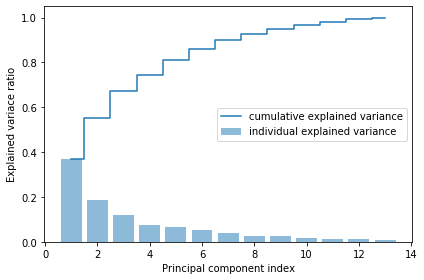

In [70]:
""" 설명된 분산 (Explained Variance)"""
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variace ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [71]:
""" 고윳값 정렬 """

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 고윳값, 고유 벡터 튜플 리스트 생성
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

# 주성분 개수를 정해 고유 벡터 선택.
# 예제는 2차원 산점도를 위해 2개
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 : \n', w)

투영 행렬 : 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


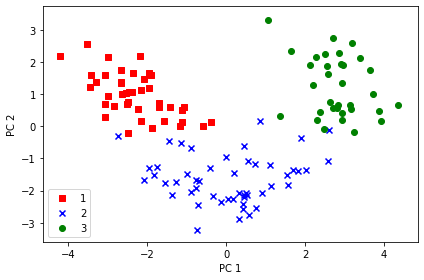

y축보다 x축에 더 넓게 퍼져있는 이유는 분산값의 차이 때문이다.


In [72]:
""" 주성분 변환 """

X_train_pca = X_train_std.dot(w)

# 시각화

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c = c, label = l, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

print('y축보다 x축에 더 넓게 퍼져있는 이유는 분산값의 차이 때문이다.')

설명된 분산 비율 :
 [0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


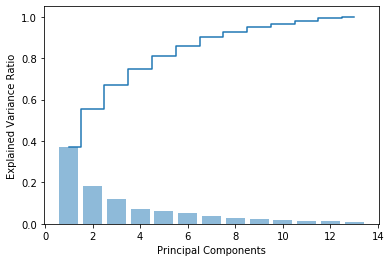

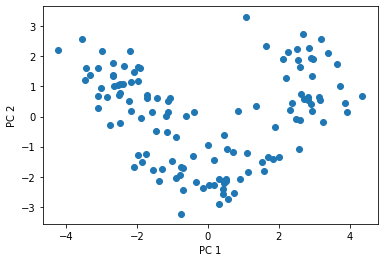

In [73]:
""" 사이킷런 PCA로 재현하기 """
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print('설명된 분산 비율 :\n', pca.explained_variance_ratio_)

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

# 2차원으로 축소
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [74]:
""" 시각화 함수 """
from matplotlib.colors import ListedColormap

# 2차원 데이터셋의 결정 경계를 시각화
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02) :
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', ' v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                   label = cl, edgecolor = 'black')
    
    # 테스트 샘플을 부각
    if test_idx : 
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', edgecolor = 'black', alpha = 1.0,
                   linewidth = 1, marker = 'o', s = 100, label = 'test set')

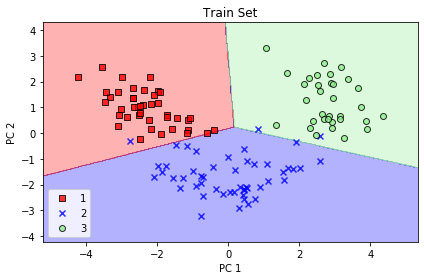

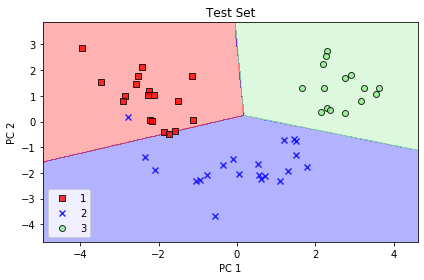

In [75]:
""" 사이킷런으로 주성분 분석 """
from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import PCA

# 재현하기 에서 쓴 pca 재활용
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.title('Train Set')
plt.tight_layout()
plt.show()

# 테스트 세트 실험
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.title('Test Set')
plt.tight_layout()
plt.show()


In [76]:
""" 전체 주성분의 설명된 분산 비율 확인하기 """

pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
print('설명된 분산 비율 : \n', pca.explained_variance_ratio_)
# n_components = None 이므로 차원 축소 대신 분ㄴ산의 크기 순서대로 모든 주성분을 반환한다.

설명된 분산 비율 : 
 [0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]
